_ is an R notebook_

# Spatial Statistics - Assignment 3 (Geostatistical analysis)

**Introduction**

This assignment is an opportunity for you to try the R statistical package for spatial interpolation and in particular, to start to learn some of the capabilities of the `gstat` package (the various commands and some of the graphical outputs which can be produced).

The commands used in this document are largely illustrative and in most cases use default arguments for the function calls. They provide basic examples of the package functionality. They are not meant to be a definitive analysis of the meuse data set and do not cover all the details of the `gstat` package capability. If you are unsure what the parameters for a particular function are or if you wish to explore other arguments related to a function, please consult the help files or the relevant package vignettes.

In this assignment, you will work on **four different spatial interpolation methods** using the meuse data set and the gstat package. These interpolation methods are:



> 1) Trend surface analysis,  
> 2) Regression modelling,  
> 3) Inverse distance weighting (IDW) and  
> 4) Kriging.

<div class="alert alert-block alert-danger"><b>REQUIRED: </b></div>

**You are required to insert your outputs and any comment into this document.** The document you submit should therefore contain the existing text in addition to:


> *   Plots and other outputs from executing the code chunks  
> *   Discussion of your plots and other outputs as well as conclusions reached.

This should also include any hypotheses and assumptions made as well as factors that may affect your conclusions. </div>

To help you with interpreting your outputs, please consult the following resources:

|            |            |
|------------|:-----------|
|Appendix A:| **Geostatistics for environmental scientists** by Webster and Oliver (2001). A copy of this is available on SAKAI > Syllabus > Assignment 2 Resources|
|Chapter 16:| **Introduction to geographic information systems** by Kang-tsung (2011).  A printout of this was handed out in class and also available on SAKAI under SAKAI > Syllabus > Assignment 2 Resources
|Chapter 8:| **Applied Spatial Data Analysis with R** by Bivand et. al. (2008).    A printout of this was handed out in class and also available on SAKAI under SAKAI > Syllabus > Assignment 2 Resources

---

In [87]:
###################################################
### Initial settings:
###################################################

options(prompt="> ", continue="+ ", digits=3, width=70, show.signif.stars=T, repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 100)
rm(list=ls())

# Install necessary packages: You only need to run this part once
#install.packages(c("sf", "gstat", "lattice", "automap"))

# Load the required libraries
#_________________________________________________________
library(sp)
library(gstat)
library(lattice)
library(automap)

# get help for the gstat package:
#______________
help(package="gstat")

# Check for example data sets in the sp package
#______________

data(package="gstat")

ERROR: Error in parse(text = x, srcfile = src): <text>:5:1: unexpected SPECIAL
4: 
5: %%
   ^


<div class="alert alert-block alert-success"><b>THE DATA: </b> </div>

This assignment is based on the meuse data set.  

The data set which can be found in the gstat package consists of 155 samples of top soil heavy metal concentrations (ppm), along with a number of soil and landscape variables. The samples were collected in a flood plain of the river Meuse, near the village [Stein in the Netherlands](https://en.wikipedia.org/wiki/Stein,_Limburg).  

Historic metal mining has caused the widespread dispersal of lead, [zinc](https://en.wikipedia.org/wiki/Zinc), [copper](https://en.wikipedia.org/wiki/Copper) and [cadmium](https://en.wikipedia.org/wiki/Cadmium) in the [alluvial](https://en.wikipedia.org/wiki/Alluvium) soil. The pollutants may constrain the land use in these areas, so detailed maps are required that identify zones with high concentrations.

In [63]:
# Description of the data from the package documentation
?meuse

In [64]:
# Load the data into R and explore the data
data(meuse)
class(meuse)

[1] "data.frame"

In [65]:
str(meuse)

'data.frame':	155 obs. of  14 variables:
 $ x      : num  181072 181025 181165 181298 181307 ...
 $ y      : num  333611 333558 333537 333484 333330 ...
 $ cadmium: num  11.7 8.6 6.5 2.6 2.8 3 3.2 2.8 2.4 1.6 ...
 $ copper : num  85 81 68 81 48 61 31 29 37 24 ...
 $ lead   : num  299 277 199 116 117 137 132 150 133 80 ...
 $ zinc   : num  1022 1141 640 257 269 ...
 $ elev   : num  7.91 6.98 7.8 7.66 7.48 ...
 $ dist   : num  0.00136 0.01222 0.10303 0.19009 0.27709 ...
 $ om     : num  13.6 14 13 8 8.7 7.8 9.2 9.5 10.6 6.3 ...
 $ ffreq  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ soil   : Factor w/ 3 levels "1","2","3": 1 1 1 2 2 2 2 1 1 2 ...
 $ lime   : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ landuse: Factor w/ 15 levels "Aa","Ab","Ag",..: 4 4 4 11 4 11 4 2 2 15 ...
 $ dist.m : num  50 30 150 270 380 470 240 120 240 420 ...


In [66]:
# The gstat package assumes that data are projected,
# i.e. they should not be provided as lattitude/longitude # and have to tell it which vectors are the corrdinates

# The command below specifies the coordinates and changes the dataframe
# to a "SpatialPointDataFrame", which is necessary for variogram modelling

coordinates(meuse) <- ~ x + y
proj4string(meuse) <- CRS("+init=epsg:28992")

In [67]:
# Explore the projected data
class(meuse)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

In [68]:
str(meuse)

Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	155 obs. of  12 variables:
  .. ..$ cadmium: num [1:155] 11.7 8.6 6.5 2.6 2.8 3 3.2 2.8 2.4 1.6 ...
  .. ..$ copper : num [1:155] 85 81 68 81 48 61 31 29 37 24 ...
  .. ..$ lead   : num [1:155] 299 277 199 116 117 137 132 150 133 80 ...
  .. ..$ zinc   : num [1:155] 1022 1141 640 257 269 ...
  .. ..$ elev   : num [1:155] 7.91 6.98 7.8 7.66 7.48 ...
  .. ..$ dist   : num [1:155] 0.00136 0.01222 0.10303 0.19009 0.27709 ...
  .. ..$ om     : num [1:155] 13.6 14 13 8 8.7 7.8 9.2 9.5 10.6 6.3 ...
  .. ..$ ffreq  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ soil   : Factor w/ 3 levels "1","2","3": 1 1 1 2 2 2 2 1 1 2 ...
  .. ..$ lime   : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
  .. ..$ landuse: Factor w/ 15 levels "Aa","Ab","Ag",..: 4 4 4 11 4 11 4 2 2 15 ...
  .. ..$ dist.m : num [1:155] 50 30 150 270 380 470 240 120 240 420 ...
  ..@ coords.nrs : int [1:2] 1 

**The Interpolation grid and the river outline**

In [69]:
# Read the interpolation grid data (set of regularly-spaced points that covers
# the study area and specify locations were predictions will be done)
data(meuse.grid)
class(meuse.grid)

[1] "data.frame"

In [70]:
coordinates(meuse.grid) <-  ~ x + y
proj4string(meuse.grid) <- CRS("+init=epsg:28992")
class(meuse.grid)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

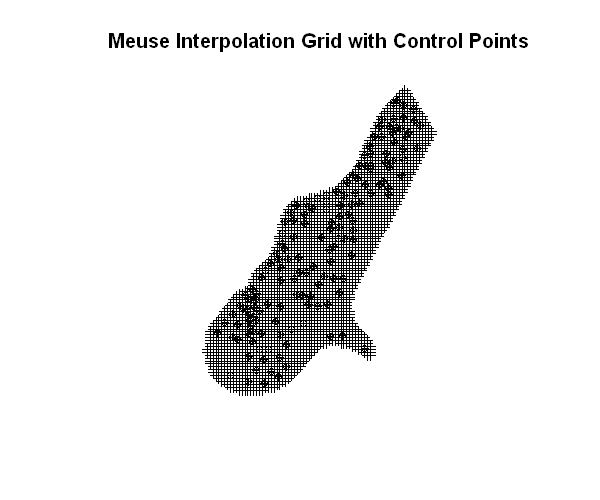

In [71]:
# Plot the interpolation grid to see what you have
plot(meuse.grid, main = "Meuse Interpolation Grid with Control Points")
points(meuse,pch=10)

In [72]:
# Promote the grid data
gridded(meuse.grid) <- TRUE
class(meuse.grid)

[1] "SpatialPixelsDataFrame"
attr(,"package")
[1] "sp"

In [73]:
# Read in the meuse river outline
data(meuse.riv)
meuse.sr = SpatialPolygons(list(Polygons(list(Polygon(meuse.riv)),"meuse.riv")))
meuse.lt = list("sp.polygons", meuse.sr, fill = "grey")

**Exploratory Data Analysis**

1.	Execute the following chunk of code and briefly describe all outputs.

<div class="alert alert-block alert-info"><b>HINT: </b>  </div>

> Describe the original and log transformed variable with respect to data distribution (symmetry, modality, presence of outliers, etc.). Also indicate if the transformation was appropriate for the data.

In [74]:
# Summary Statistics
summary(meuse$cadmium)
summary(log(meuse$cadmium))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.20    0.80    2.10    3.25    3.85   18.10 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.609  -0.223   0.742   0.561   1.348   2.896 

In [75]:
# Steam and leaf plot
stem(meuse$cadmium)
stem(log(meuse$cadmium))


  The decimal point is at the |

   0 | 2222222222222222222224444444444788888888899
   1 | 0122222233333445555666777778888
   2 | 00011111244445556667777888899
   3 | 0011112245578999
   4 | 237
   5 | 568
   6 | 3568
   7 | 0013489
   8 | 122367
   9 | 4445
  10 | 89
  11 | 27
  12 | 09
  13 | 
  14 | 1
  15 | 
  16 | 
  17 | 0
  18 | 1


  The decimal point is 1 digit(s) to the left of the |

  -16 | 111111111111111111111
  -14 | 
  -12 | 
  -10 | 
   -8 | 2222222222
   -6 | 
   -4 | 
   -2 | 6222222222
   -0 | 11
    0 | 00888888
    2 | 6666644
    4 | 1111777333339999
    6 | 999444449
    8 | 88882226669999
   10 | 33336600333366
   12 | 25514666
   14 | 465
   16 | 026
   18 | 47925569
   20 | 057900256
   22 | 444589
   24 | 2686
   26 | 5
   28 | 30



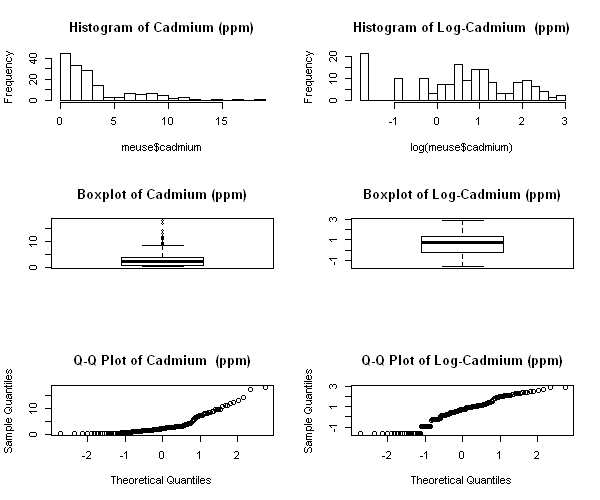

In [76]:
# Histogram and Q-Q Plots
par(mfrow=c(3,2)) # 6 figures per page arranged in 3 rows and 2 columns
hist(meuse$cadmium, n=20, main = "Histogram of Cadmium (ppm)")
hist(log(meuse$cadmium), n=20, main = "Histogram of Log-Cadmium  (ppm)")

boxplot(meuse$cadmium, main = "Boxplot of Cadmium (ppm)")
boxplot(log(meuse$cadmium), main = "Boxplot of Log-Cadmium (ppm)")

qqnorm(meuse$cadmium,  main = "Q-Q Plot of Cadmium  (ppm)")
qqnorm(log(meuse$cadmium),  main = "Q-Q Plot of Log-Cadmium (ppm)")

par(mfrow=c(1,1)) # Reset to default ploting of 1 figure per page

In [77]:
# Shapiro-Wilk normality test
shapiro.test(meuse$cadmium)
shapiro.test(log(meuse$cadmium))


	Shapiro-Wilk normality test

data:  meuse$cadmium
W = 0.8, p-value = 9e-14



	Shapiro-Wilk normality test

data:  log(meuse$cadmium)
W = 0.9, p-value = 1e-05


<div class="alert alert-block alert-warning"><b>QUESTIONS: </b> </div>

*   **Provide the summary Statistics**

> [double click in this cell and type your answer]



*   **Provide Plots from the code above**

> [double click in this cell and type your answer]

*   **Provide the results from Shapiro-Wilk normal Tests**



> [double click in this cell and type your answer]

*   **Explain the results from summary statistics and plots**

> [double click in this cell and type your answer]

- **Provide any additional relevant comments**

> [double click in this cell and type your answer]

**Exploratory Spatial Data Analysis continued**

2. Execute the following code chunk and briefly describe what you observe with respect to the spatial distribution of Cadmium.

<div class="alert alert-block alert-info"><b>HINT: </b>  </div>

> Talk about positions of the data in relation to the bounds of the region, the locations of high and low values and the presence of possible outliers.

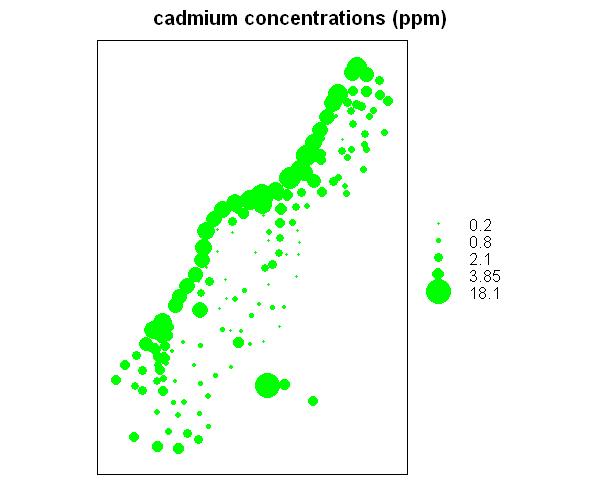

In [78]:
# Obtain a bubble plot of the cadmium data with the dots scaled to concentration
bubble(meuse, "cadmium", col = "green" , main = "cadmium concentrations (ppm)")

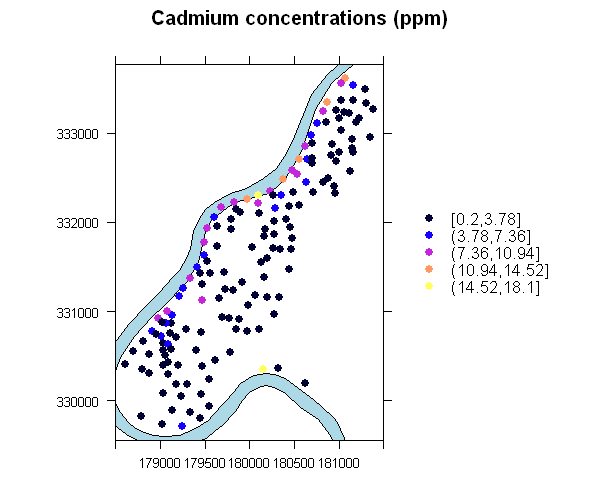

In [79]:
# Obtain a dot plot and add some context to the plot
sp.theme(TRUE)
spplot(meuse, "cadmium", key.space = "right", col.regions=bpy.colors(),
       main = "Cadmium concentrations (ppm)",
       scales = list(draw = TRUE),# Add a reference by showing the coordinate system
       sp.layout= list("sp.polygons", meuse.sr, fill = "lightblue")
       # Add geographic reference (Meuse river boundaries)
       )


<div class="alert alert-block alert-warning"><b>ANSWERS / COMMENTS: </b> </div>

> [double click in this cell and describe what you observe with respect to the spatial distribution of Cadmium]

**Regression Model**

3. Use the following code chunk to perform the various analyses required for a regression interpolation with distance to river as an independent variable.


<div class="alert alert-block alert-info"><b>HINT: </b>  </div>

> You should include a discussion on the nature of relationship between the dependent and independent variable, the model fit: model summary and regression diagnostics ***{say which, (if any), of the assumptions underlying linear regression are violated}*** and the quality of interpolation with respect to the distribution and density of controls points, etc.

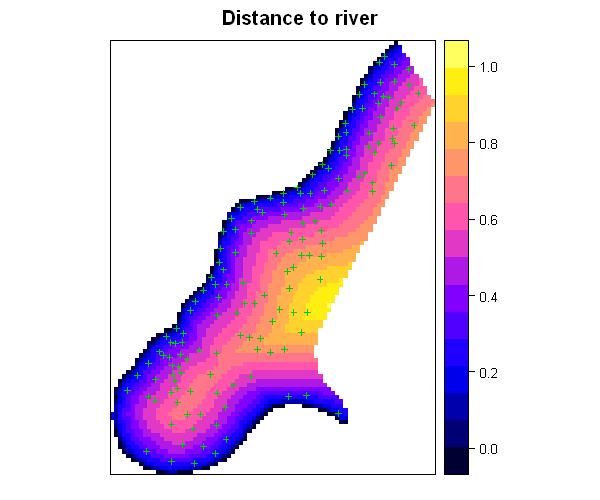

In [88]:
#_________________________________________________________
### To produce  Fig. like 8.1 in Ch 8 of Bivand et al. (2008)
#_________________________________________________________

# Map of distance to river:
meuse.grid$sqrtdist = sqrt(meuse.grid$dist)
spplot(meuse.grid["sqrtdist"], col.regions = bpy.colors() ,
       sp.layout = list("sp.points", meuse, col = 3, cex=.5),
       main = "Distance to river")

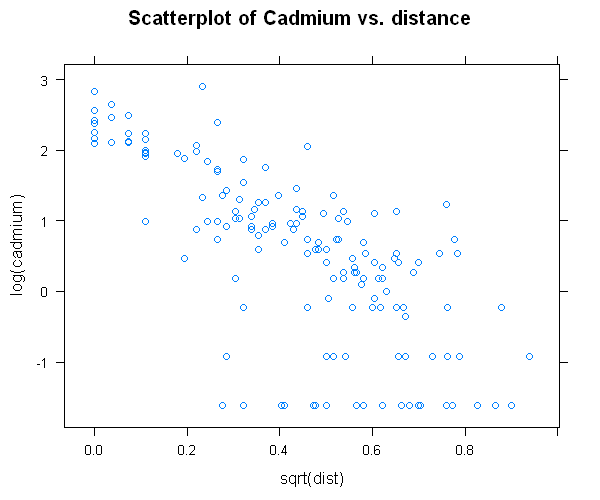

In [81]:
# Cadmium (ppm) vs. distance to river
xyplot(log(cadmium)~sqrt(dist), as.data.frame(meuse),
       main="Scatterplot of Cadmium vs. distance")

In [89]:
# Fit the regression model
cadmium.lm <- lm(log(cadmium)~sqrt(dist), meuse)

# Get a summary of the regression model
summary(cadmium.lm)


Call:
lm(formula = log(cadmium) ~ sqrt(dist), data = meuse)

Residuals:
   Min     1Q Median     3Q    Max 
-2.784 -0.254  0.180  0.501  1.908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.232      0.151    14.8   <2e-16 ***
sqrt(dist)    -3.842      0.308   -12.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.866 on 153 degrees of freedom
Multiple R-squared:  0.504,	Adjusted R-squared:  0.501 
F-statistic:  155 on 1 and 153 DF,  p-value: <2e-16


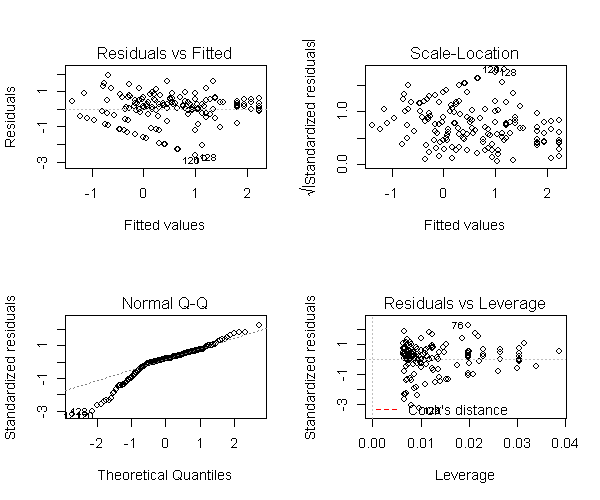

In [90]:
# Get diagnostic plots
layout(matrix(1:4, ncol=2))
plot(cadmium.lm, add.smooth = FALSE)
layout(1)

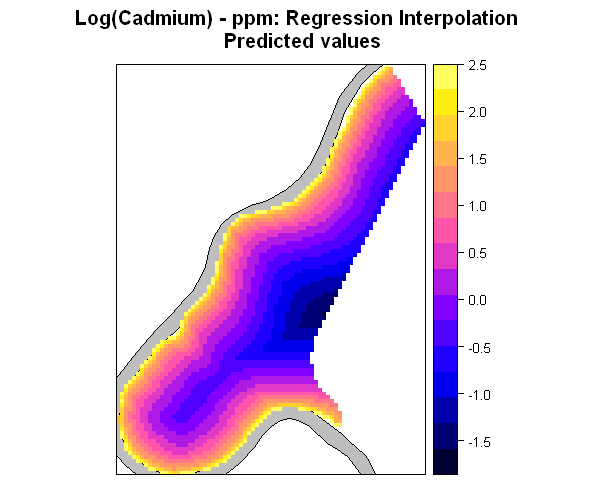

In [91]:
# Get Predicted Values and Standard Error of Fit for all locations on the grid
meuse.grid$lzn.fit <- predict(cadmium.lm, meuse.grid)
meuse.grid$se.fit <- predict(cadmium.lm, meuse.grid, se.fit=TRUE)$se.fit

# Plot the predicted values
spplot(meuse.grid, "lzn.fit", sp.layout = meuse.lt,
       main = "Log(Cadmium) - ppm: Regression Interpolation \n Predicted values")

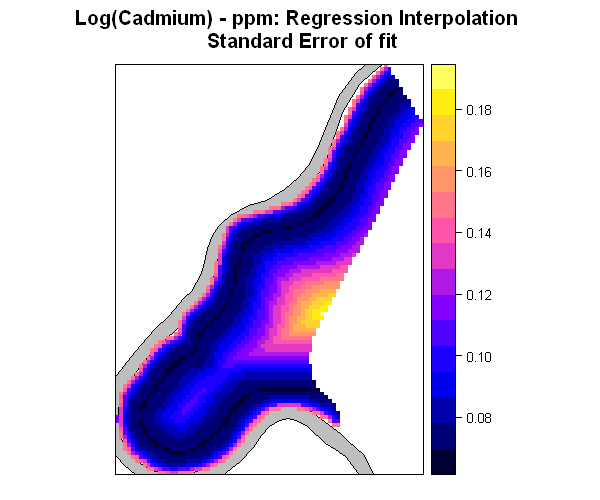

In [92]:
# Plot the Standard Error of fit
spplot(meuse.grid, "se.fit", sp.layout = meuse.lt,
       main = "Log(Cadmium) - ppm: Regression Interpolation \n Standard Error of fit")


<div class="alert alert-block alert-warning"><b>ANSWERS / COMMENTS: </b> </div>

> [double click in this cell and write your answer here. i.e.: the nature of relationship between the dependent and independent variables, the model fit: model summary and regression diagnostics, etc.]

**Trend Surface Analysis**

4. Run the following code chunk to perform trend surface interpolation. Compare the three interpolation maps and discuss the results. Which one gives a better fit? Why?

<div class="alert alert-block alert-info"><b>HINT: </b>  </div>

> Talk about the appropriateness of trend orders with respect to the nature of the interpolated surface, the quality of interpolation with respect to the distribution and density of controls points etc.

[ordinary or weighted least squares prediction]
[ordinary or weighted least squares prediction]
[ordinary or weighted least squares prediction]


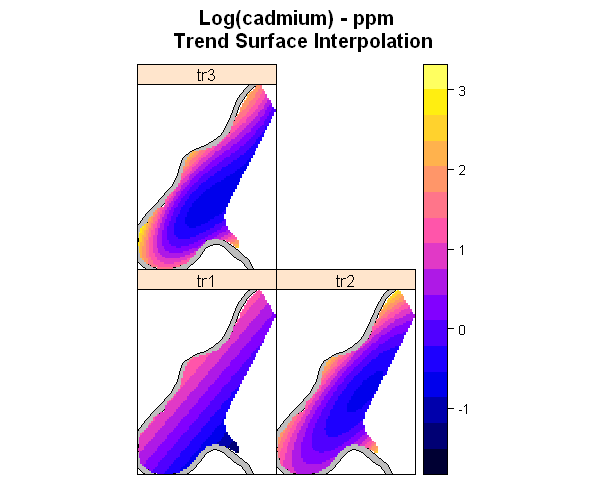

In [93]:
#_________________________________________________________
#  # Trend surface up to degree 3
# Note: tr1, tr2 and tr3 are names for Trend surface of order 1, 2 and 3 respectively
#_________________________________________________________

meuse.grid$tr1 = krige(log(cadmium) ~ 1, meuse, meuse.grid, degree = 1)$var1.pred
meuse.grid$tr2 = krige(log(cadmium) ~ 1, meuse, meuse.grid, degree = 2)$var1.pred
meuse.grid$tr3 = krige(log(cadmium) ~ 1, meuse, meuse.grid, degree = 3)$var1.pred
spplot(meuse.grid, c("tr1", "tr2", "tr3"), sp.layout = meuse.lt,
       main = "Log(cadmium) - ppm \n Trend Surface Interpolation")


<div class="alert alert-block alert-warning"><b>ANSWERS / COMMENTS: </b> </div>

> [double click in this cell and compare the three interpolation maps and discuss the results here]

**Inverse distance weighted interpolation**

5. Use the following code chunk to generate interpolated surfaces of log (cadmium) concentration obtained using Inverse-Distance Weighting (IDW) with different power functions (p). Discuss all outputs and draw conclusions. Give reasons for your conclusions.


<div class="alert alert-block alert-info"><b>HINT: </b>  </div>

> You should say something about the role of the power function and the quality/behaviour of the predictions with respect to the distribution and density of controls points etc.

[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]
[inverse distance weighted interpolation]


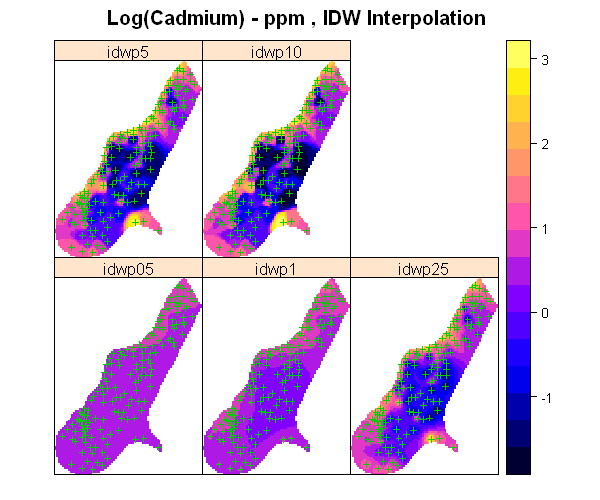

In [94]:
# Run the IDW interpolation
# Check the effect of power (p) on the IDW interpolation
# by changing the value of "idp"

meuse.grid$idwp05 = idw(log(cadmium)  ~ 1, meuse, meuse.grid, idp = 0.5)$var1.pred
meuse.grid$idwp1 = idw(log(cadmium)  ~ 1, meuse, meuse.grid, idp = 1)$var1.pred
meuse.grid$idwp25 = idw(log(cadmium)  ~ 1, meuse, meuse.grid, idp = 2.5)$var1.pred
meuse.grid$idwp5 = idw(log(cadmium)  ~ 1, meuse, meuse.grid, idp = 5)$var1.pred
meuse.grid$idwp10 = idw(log(cadmium)  ~ 1, meuse, meuse.grid, idp = 10)$var1.pred
# Plot the outputs and the control points
spplot(meuse.grid, c("idwp05", "idwp1", "idwp25","idwp5", "idwp10"),
       sp.layout = list("sp.points", meuse, col = 3, cex=.5),
       main = "Log(Cadmium) - ppm , IDW Interpolation ")


<div class="alert alert-block alert-warning"><b>ANSWERS / COMMENTS: </b> </div>

[double click in this cell and Discuss the outputs, draw conclusions and give reasons for your conclusions here]

**Variogram and kriging**


6. Use the next set of commands to estimate the variogram and to perform kriging interpolation.

<div class="alert alert-block alert-info"><b>HINT: </b>  </div>

> Page numbers or plot numbers from sections with similar outputs from Bivand et al. (2008) have been indicated in the comments attached to the codes. Please refer to those sections/plots for guidance. In general, discuss all outputs (text and plots). What they are, what they do, what assumptions have been made, etc.

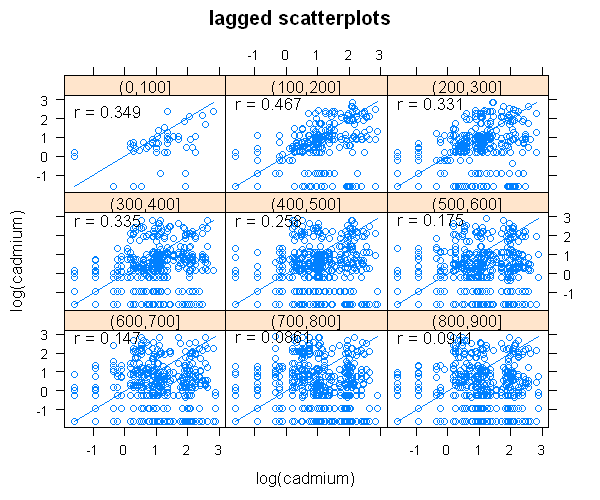

In [95]:
###################################################
### 8.4 Estimating Spatial Correlation: The Variogram - Bivand et al. (2008)
### 8.4.1 Exploratory Variogram Analysis
###################################################

### h-scatterplots/ lagged scatterplots
hscat(log(cadmium)~1,meuse,(0:9)*100)

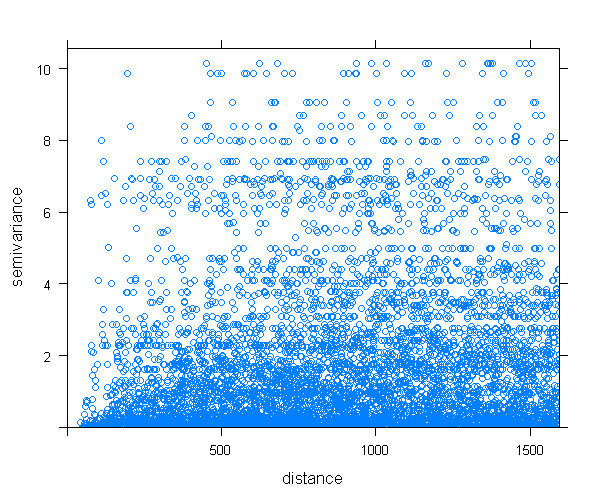

In [96]:
### Variogram cloud
plot(variogram(log(cadmium) ~ 1, meuse, cloud = TRUE))

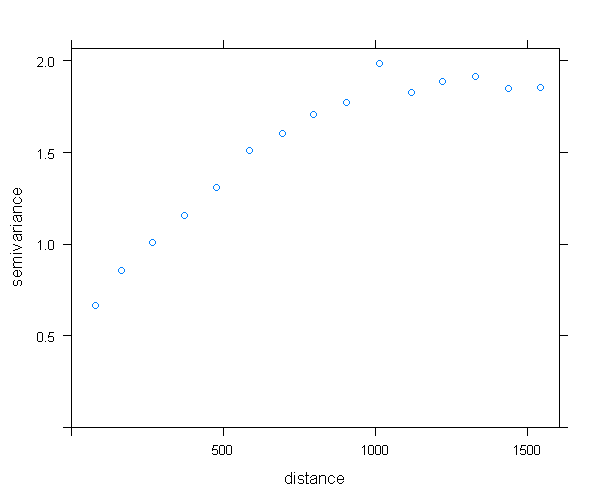

In [97]:
###################################################
### Sample variogram (binned variogram) plot of (8.4)
###################################################
plot(variogram(log(cadmium) ~ 1, meuse))


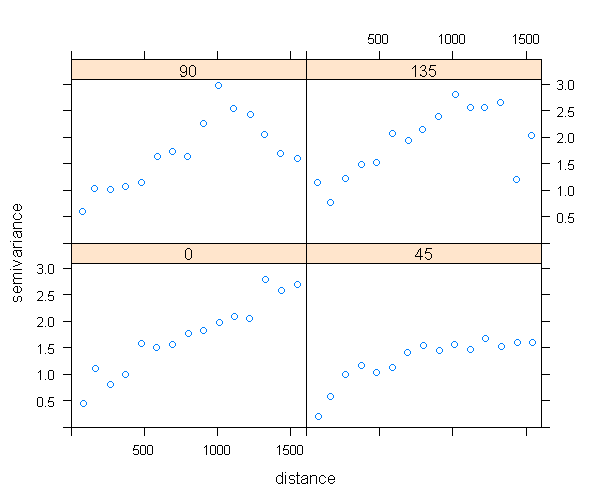

In [98]:
###################################################
### Variograms in four different angles
###################################################
plot(variogram(log(cadmium) ~ 1, meuse, alpha = c(0, 45, 90, 135)))


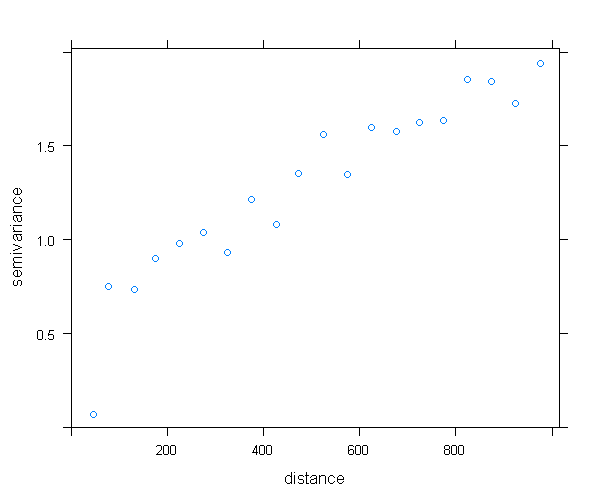

In [99]:
###################################################
### Override the default cutoff and interval width values ###  See Bivand et al. (2008)
###################################################
plot(variogram(log(cadmium) ~ 1, meuse, cutoff = 1000, width = 50))


In [100]:
###################################################
### Specifying interval for the distance vector  - See Bivand et al. (2008)
###################################################
variogram(log(cadmium) ~ 1, meuse, boundaries = c(0,50,100,seq(250,1500,250)))

np,dist,gamma,dir.hor,dir.ver,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,46.6,0.0683,0,0,var1
50,78.2,0.7490,0,0,var1
442,184.4,0.8917,0,0,var1
1107,379.7,1.1332,0,0,var1
1317,626.8,1.5495,0,0,var1
1341,874.6,1.7975,0,0,var1
1190,1122.6,1.8848,0,0,var1
1057,1375.1,1.8732,0,0,var1


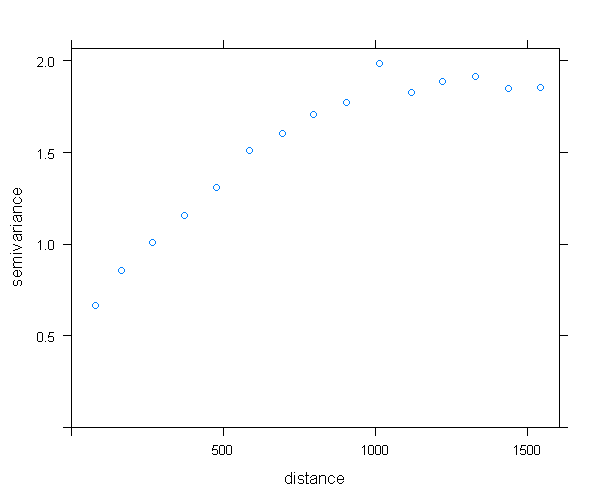

In [101]:
######################################### ##########
### Variogram in Fig. 8.6 - Bivand et al. (2008)
###################################################
v <- variogram(log(cadmium) ~ 1, meuse)
plot(v)


In [102]:
###################################################
### Initial values for the variogram fit
###################################################
v.fit <- fit.variogram(v, vgm(1, "Sph", 800, 1))

In [103]:
###################################################
### Partial fitting of variogram coefficients : PAGE 204 - Bivand et al. (2008)
###################################################
fit.variogram(v, vgm(1, "Sph", 800, 0.06), fit.sills = c(FALSE, TRUE))

,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.06,0,0.0,0,0,0,1,1
2,Sph,1.49,496,0.5,0,0,0,1,1


In [104]:
###################################################
###  REML (restricted maximum likelihood) fitting : PAGE 205 - Bivand et al. (2008)
###################################################
fit.variogram.reml(log(cadmium)~1, meuse, model=vgm(0.6, "Sph", 800, 0.06))

,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.424,0,0.0,0,0,0,1,1
2,Sph,1.317,800,0.5,0,0,0,1,1


In [105]:
###################################################
### 8.4.4 Anisotropy  - Bivand et al. (2008)
###################################################
v.dir <- variogram(log(cadmium)~1,meuse,alpha=(0:3)*45)
v.anis <- vgm(.6, "Sph", 1600, .05, anis=c(45, 0.3))

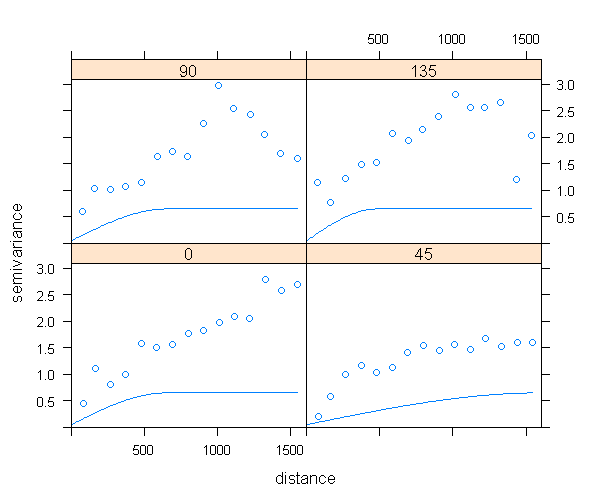

In [106]:
###################################################
### Fig. 8.7 - Bivand et al. (2008)
###################################################
plot(v.dir, v.anis)


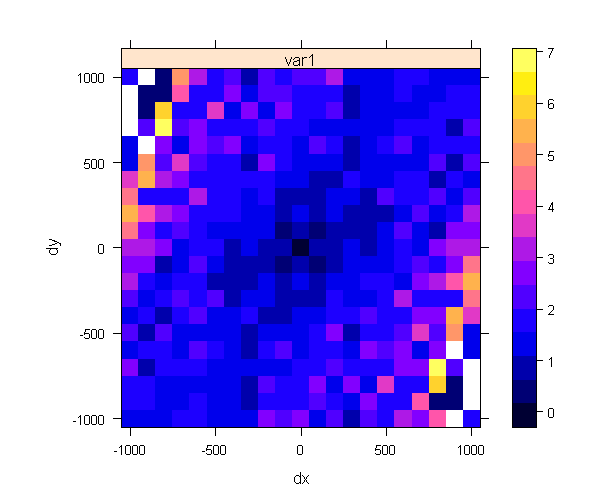

In [107]:
###################################################
### variogram map - Bivand et al. (2008)
###################################################
plot(variogram(log(cadmium)~1,meuse, map=TRUE, cutoff=1000, width=100))


In [108]:
###################################################
### 8.5.1 Simple Kriging and Ordinary Kriging  - Bivand et al. (2008)
###################################################

lz.sk <- krige(log(cadmium)~1, meuse, meuse.grid, v.fit, beta = 5.9)
lz.ok <- krige(log(cadmium)~1, meuse, meuse.grid, v.fit)


[using simple kriging]
[using ordinary kriging]


In [110]:
summary(lz.sk)

Object of class SpatialPixelsDataFrame
Coordinates:
     min    max
x 178440 181560
y 329600 333760
Is projected: TRUE 
proj4string : [+init=epsg:28992]
Number of points: 3103
Grid attributes:
  cellcentre.offset cellsize cells.dim
x            178460       40        78
y            329620       40       104
Data attributes:
   var1.pred        var1.var    
 Min.   :-1.11   Min.   :0.692  
 1st Qu.:-0.18   1st Qu.:0.793  
 Median : 0.63   Median :0.841  
 Mean   : 0.65   Mean   :0.885  
 3rd Qu.: 1.37   3rd Qu.:0.937  
 Max.   : 3.30   Max.   :1.420  

In [111]:
summary(lz.ok)

Object of class SpatialPixelsDataFrame
Coordinates:
     min    max
x 178440 181560
y 329600 333760
Is projected: TRUE 
proj4string : [+init=epsg:28992]
Number of points: 3103
Grid attributes:
  cellcentre.offset cellsize cells.dim
x            178460       40        78
y            329620       40       104
Data attributes:
   var1.pred         var1.var    
 Min.   :-1.221   Min.   :0.692  
 1st Qu.:-0.419   1st Qu.:0.793  
 Median : 0.332   Median :0.841  
 Mean   : 0.308   Mean   :0.887  
 3rd Qu.: 0.958   3rd Qu.:0.938  
 Max.   : 2.298   Max.   :1.446  

<div class="alert alert-block alert-warning"><b>QUESTIONS, ANSWERS / COMMENTS: </b> </div>

> [double click in this cell and write your answer here: discuss all outputs (text and plots). What they are, what they do, what assumptions have been made, etc.]

*   What other output(s) would you generate to access the quality of the Simple and Ordinary Kriging Interpolation?

<div class="alert alert-block alert-info"><b>HINT: </b>How would you judge the quality of the interpolation? </div>

> [double click in this cell and write your answer here]


*   Do a visual comparison of the interpolation results from the methods and discuss your observations.

<div class="alert alert-block alert-info"><b>HINT: </b>What differences do you see from the interpolated maps you produced in terms of the behaviour of the predictions with respect to the distribution and density of controls points etc. </div>


> [double click in this cell and write your answer here]

*    How else would you go about comparing the results from the various interpolation methods?

<div class="alert alert-block alert-info"><b>HINT: </b>Summarise section 16.5 of Kang-tsung (2011). </div>

> [double click in this cell and write your answer here]